In [13]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.cm as cm
from pathlib import Path
import norm
import physconst as pc
from vtk_reader import read_vtk

In [14]:
data_dir = Path('/Users/satoukakeru/lab/Jet_Torus/runs')
run_ids1 = ['00a']
run_ids2 = ['00a2']
fname = 'accretion_rate.dat'

In [15]:
data_fbase = 'data'
data_type = 'flt'
nc = 128
ndata1 = [116]
ndata2 = [302]
grid = [nc, nc, nc]
nvar = 7
x1_min, x1_max = -5., 5.  # code units
x2_min, x2_max = -5., 5.  # code units
x3_min, x3_max = -5., 5.  # code units
dx1 = (x1_max - x1_min) / grid[0]
dx2 = (x2_max - x2_min) / grid[1]
dx3 = (x3_max - x3_min) / grid[2]
cell_volume = dx1 * dx2 * dx3

nm = norm.PhysNorm(x=pc.pc, v=pc.c, dens=0.60364*pc.amu, temp=pc.c*pc.c*pc.amu/pc.kboltz, curr=1.)
fnum2year1 = nm.t / pc.yr * 24.5009005929988 * 10
fnum2year2 = nm.t / pc.yr * 24.5009005929988

In [16]:
osph = 0.45
x1 = np.linspace(x1_min, x1_max, nc)
x2 = np.linspace(x2_min, x2_max, nc)
x3 = np.linspace(x3_min, x3_max, nc)
x1g, x2g, x3g = np.meshgrid(x1, x2, x3, sparse=True)
r2 = x1g * x1g + x2g * x2g + x3g * x3g

In [33]:
mass1 = []
for ir, run_id1 in enumerate(run_ids1):
    for idata1 in range(ndata1[ir]):
        data_fname = data_dir / run_id1 / f'{data_fbase}.{idata1:0>4d}.{data_type}'

        if data_type == 'flt':
            hydro = np.fromfile(data_fname, dtype=np.float32).reshape((nvar, grid[2], grid[1], grid[0]))
            density1 = hydro[0, :, :, :]
            density_cut1 = np.ma.masked_less(density1, 0.3)
            #density_cut1 = np.ma.masked_where(r2<osph*osph, density_cut1)

        elif data_type == 'vtk':
            with open(data_fname, 'rb') as fp:
                hydro = read_vtk(fp, grid[0], grid[1], grid[2])

        mass1.append(np.sum(density_cut1) * cell_volume * nm.m / pc.msun)

    time1 = np.arange(idata1+1) * fnum2year1

In [34]:
mass2 = []
for ir, run_id2 in enumerate(run_ids2):
    for idata2 in range(ndata2[ir]):
        data_fname = data_dir / run_id2 / f'{data_fbase}.{idata2:0>4d}.{data_type}'

        if data_type == 'flt':
            hydro = np.fromfile(data_fname, dtype=np.float32).reshape((nvar, grid[2], grid[1], grid[0]))
            density2 = hydro[0, :, :, :]
            density_cut2 = np.ma.masked_less(density2, 0.3)
            #density_cut2 = np.ma.masked_where(r2<osph*osph, density_cut2)

        elif data_type == 'vtk':
            with open(data_fname, 'rb') as fp:
                hydro = read_vtk(fp, grid[0], grid[1], grid[2])

        mass2.append(np.sum(density_cut2) * cell_volume * nm.m / pc.msun)

    time2 = np.arange(idata2+1) * fnum2year2

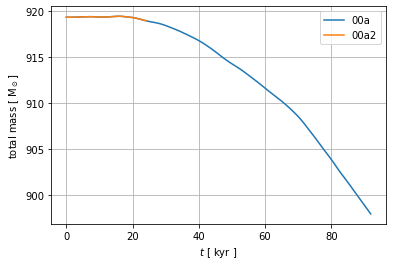

In [35]:
pl.plot(time1[:] / 1000., mass1, label=f'{run_id1}')
pl.plot(time2[:] / 1000., mass2, label=f'{run_id2}')

pl.xlabel(r'$t$ [ kyr ]')
pl.ylabel(r'total mass [ M$_\odot$]')
#pl.ylim(0.0, 0.2)
pl.legend()
pl.grid()
pl.savefig('total_mass_0.3.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>